In [1]:
# !pip uninstall pandas
# !echo Artur119289 | sudo -S pip3 install --user --upgrade pandas
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import json
import os
import re
import urllib3
import urllib.parse
from urllib.request import urlopen
from urllib.parse import urlparse
import numpy as np
import pandas as pd

/tmp/ipykernel_83083/192474896.py:15: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
def get_status(logs):
    for log in logs:
        if log['message']:
            d = json.loads(log['message'])
            try:
                content_type = 'text/html' in d['message']['params']['response']['headers']['content-type']
                response_received = d['message']['method'] == 'Network.responseReceived'
                if content_type and response_received:
                    return d['message']['params']['response']['status']
            except:
                pass

def preprocess(line):
    return ' '.join(line.replace('\r',' ').replace('\xa0',' ').replace('\xad', ' ').strip().split())

def get_text(soup):
    text = []
    for script in soup(["script", "style","footer","input",'link','meta','button']):
        script.extract()

    paragraph = '\n'.join(list(dict.fromkeys([text for text in soup.stripped_strings])))
    return paragraph


def get_all_links(url,link_hierarchy,soup):
    child_links = []
    for script in soup(["script", "style"]):
        script.extract()
    
    sublinks = [a.get('href') for a in soup.find_all('a') if a.get('href') and a.get('href').startswith('/')]
    
    sublinks = [link[1:] for link in sublinks]
    sublinks = [*set(sublinks)]
    sublinks = list(filter(None, sublinks))
    
    for link in sublinks:
        if ".pdf" not in link or ".PDF" not in link:
            if 'www' in link:
                new_url = os.path.join(url[:url.rfind('www')], urlparse(url).netloc, link)
            else:
                new_url = os.path.join(url[:url.rfind('//')+2], urlparse(url).netloc, link)
            child_links.append(new_url)
    
    link_hierarchy[url] = child_links
    return

In [26]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
chrome_options.set_capability('goog:loggingPrefs', {'performance': 'ALL'})
driver = webdriver.Chrome(options = chrome_options)

In [10]:
links = input().split()
responses = []
selenium = []
status = 0
for link in links:
    try:
        page = requests.get(link)
        status = page.status_code
    except:
        pass
    if status == 200:
        page.encoding = 'utf-8'
        responses.append((link, page.text))
    else:
        page.encoding = 'utf-8'
        selenium.append(link)
        print(link, status, sep=' : ')
    status = 0

 https://alfabank.ru/ https://www.tinkoff.ru/ http://www.sberbank.ru/ru/person https://www.vtb.ru/ https://spbbank.ru/ https://business.rsb.ru/ https://www.gazprombank.ru/ https://www.raiffeisen.ru/ https://www.rosneft.ru/ https://lukoil.ru/ https://www.x5.ru/ru/ https://www.gazprom.ru/ https://www.gkm.ru/ https://www.tatneft.ru/ https://moskva.mts.ru/personal https://www.tplusgroup.ru/ https://www.evraz.com/ru/ https://www.eurochem.ru/


https://www.vtb.ru/ : 403
https://www.gazprombank.ru/ : 0
https://www.rosneft.ru/ : 403
https://lukoil.ru/ : 403
https://www.gkm.ru/ : 0
https://www.tatneft.ru/ : 0
https://www.tplusgroup.ru/ : 403


[('https://alfabank.ru/',
  '<!doctype html>\n    <html class="site-assr team-cpas instance-assr-cpas" lang="ru">\n    <head>\n        <script>if (window.performance && performance.mark) { performance.mark(\'head-start\'); }</script>\n        <meta charset="utf-8" />\n        <meta name="viewport" content="width=1280" />\n\n        \n  <link rel="icon" type="image/x-icon" href="//alfabank.st/media/favicon_alfa-logo_32x32_common_28-08-2019.ico"/>\n  <link rel="icon" type="image/png" href="//alfabank.st/media/favicon_alfa-logo_16x16_desktop_08-08-2019.png" sizes="16x16"/>\n  <link rel="icon" type="image/png" href="//alfabank.st/media/favicon_alfa-logo_32x32_desktop_08-08-2019.png" sizes="32x32"/>\n  <link rel="icon" href="//alfabank.st/media/favicon_alfa-logo_192x192_common_09-08-2019.png" sizes="192x192"/>\n  <link rel="apple-touch-icon" href="//alfabank.st/media/favicon_alfa-logo_180x180_common_09-08-2019.png" sizes="180x180"/>\n  <link rel="mask-icon" href="//alfabank.st/media/favicon
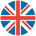
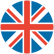
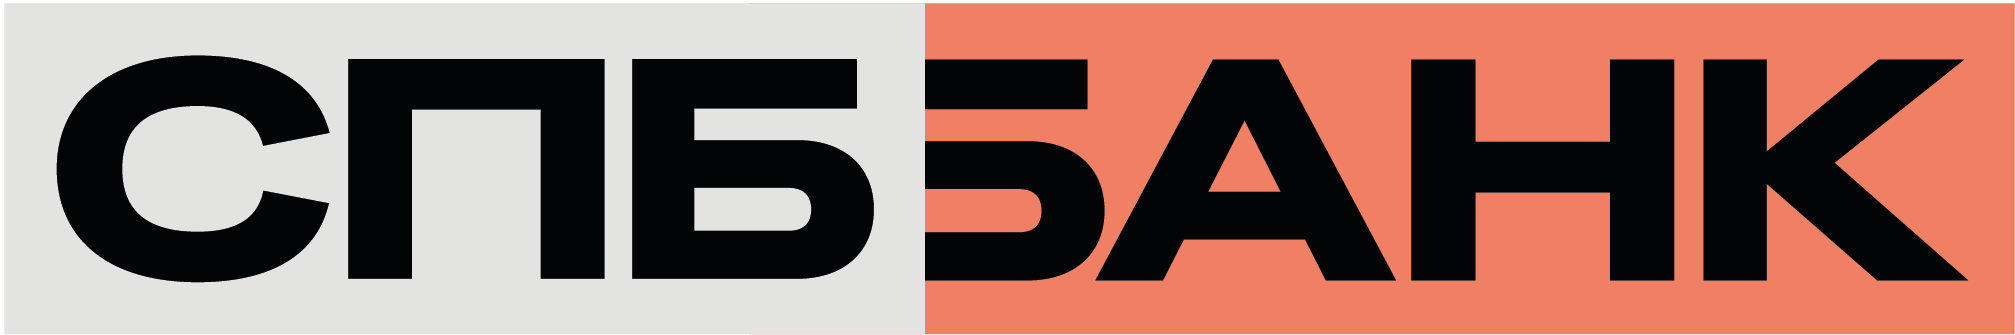
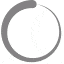

In [237]:
responses

In [59]:
for link in selenium:
    driver.get(link)
    logs = driver.get_log('performance')
    print(link,' : ',get_status(logs))

https://www.vtb.ru/  :  200
https://www.gazprombank.ru/  :  200
https://www.rosneft.ru/  :  200
https://lukoil.ru/  :  None
https://www.gkm.ru/  :  200
https://www.tatneft.ru/  :  200
https://www.tplusgroup.ru/  :  200


In [13]:
link_hierarchy = {}
soup = BeautifulSoup(responses[0][1],'html.parser')
get_all_links('https://alfabank.ru/',link_hierarchy,soup)

In [14]:
link_hierarchy

{'https://alfabank.ru/': ['https://alfabank.ru/atm/',
  'https://alfabank.ru/get-money/mortgage/service/',
  'https://alfabank.ru/get-money/credit-cards/alfa-travel/',
  'https://alfabank.ru/make-money/service-for-saving/autopay/',
  'https://alfabank.ru/help/articles/credit/',
  'https://alfabank.ru/feedback/support/',
  'https://alfabank.ru/make-money/safe/',
  'https://alfabank.ru/make-money/investments/help/',
  'https://alfabank.ru/make-money/investments/',
  'https://alfabank.ru/make-money/investments/forex/',
  'https://alfabank.ru/about/safety/',
  'https://alfabank.ru/make-money/investments/catalog/',
  'https://alfabank.ru/sme/profits-new/',
  'https://alfabank.ru/make-money/investments/brokerskij-schyot-business/',
  'https://alfabank.ru/sme/profits/',
  'https://alfabank.ru/corporate/rko/start/',
  'https://alfabank.ru/make-money/investments/iir/',
  'https://alfabank.ru/corporate/ved/bivalutniy_depozit/',
  'https://alfabank.ru/make-money/deposits/alfa/#HowToGet',
  'https

In [40]:
linklist = link_hierarchy[responses[0][0]]
test_data = pd.DataFrame(columns=['Parent Link', 'Actual Link', 'Page Text'])
parent = responses[0][0]
for link in linklist:
   try:
        current_response = requests.get(link)
        soup = BeautifulSoup(current_response.text,'html.parser')
        row = {'Parent Link': [parent], 'Actual Link': [link], 'Page Text': [get_text(soup)]}
        test_data = pd.concat([test_data,pd.DataFrame(row)],ignore_index = True)
   except:
        pass

In [41]:
test_data

,Parent Link,Actual Link,Page Text
0,https://alfabank.ru/,https://alfabank.ru/atm/,Банкоматы Альфа-Банка в городе Москва\nБанкома...
1,https://alfabank.ru/,https://alfabank.ru/get-money/mortgage/service/,Управляйте ипотекой с комфортом в приложении 🅰...
2,https://alfabank.ru/,https://alfabank.ru/get-money/credit-cards/alf...,Кредитная карта Alfa Travel 🌴 — оформить креди...
3,https://alfabank.ru/,https://alfabank.ru/make-money/service-for-sav...,Услуга для накопления «Платеж по расписанию»\n...
4,https://alfabank.ru/,https://alfabank.ru/help/articles/credit/,Кредитование: полезная информация от экспертов...
...,...,...,...
173,https://alfabank.ru/,https://alfabank.ru/get-money/credit-cards/zay...,Заявка на кредитную карту онлайн - оформить кр...
174,https://alfabank.ru/,https://alfabank.ru/get-money/mortgage/novostr...,Ипотека на новостройку 2023 в 🅰️ Альфа-Банке —...
175,https://alfabank.ru/,https://alfabank.ru/sme/deposits/,Депозиты для бизнеса - вклады для юридических ...
176,https://alfabank.ru/,https://alfabank.ru/retail/insurance-digital/,Страхование\nЧастным лицам\nМалому бизнесу и И...


In [42]:
test_data.to_csv('AlphaBankParse.csv')